<a href="https://colab.research.google.com/github/naveenraj208/ml-lab-work/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                0           1           2            3           4  \
0     38687.88477  192.737565  188.366005  2348.285240  188.609889   
1     29532.98806  -54.124623  -22.492524  1648.326090   35.160362   
2     29511.41174  -54.495937  -25.026162  1658.645198   34.814464   
3     29060.40637  -19.466804  -11.668273  1487.612245    7.675333   
4     29039.93589  -19.725400   -9.218980  1497.054471    8.947552   
...           ...         ...         ...          ...         ...   
2245  34590.67425  -90.481178  421.895545  2269.474748  107.710202   
2246  34463.79965  -75.135670  422.035399  2045.071565 -139.594897   
2247  33276.41490  346.619982   43.823796  1314.651432   10.557620   
2248  33278.26695  344.970914   44.197445  1312.348411   17.356769   
2249  33006.65196  329.119591   48.862411   975.010421   24.384097   

                5           6           7           8           9  ...  \
0     3359.777672 -454.999177 -201.722600  -42.369585 -277.176688  ...   
1     1980.

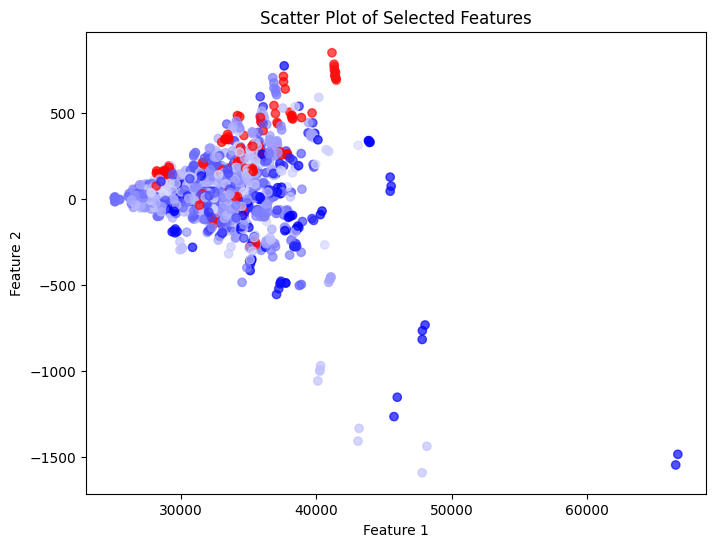

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('DCT_withoutduplicate 5.csv')

# Select two features for the classification
X = data[['0', '1']]  # Replace '0' and '1' with actual feature names if needed
y = data['LABEL']  # Assuming 'LABEL' is the target column

# Replace NaN with the mean of each column from 0 to 195
data.iloc[:, 0:196] = data.iloc[:, 0:196].apply(lambda x: x.fillna(x.mean()), axis=0)

print(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the selected features (optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Selected Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 9  0  0 ...  0  0  0]
 [ 1 11  0 ...  0  0  1]
 [ 0  0 10 ...  0  1  0]
 ...
 [ 0  0  1 ...  3  0  0]
 [ 0  0  0 ...  0  6  2]
 [ 0  0  0 ...  0  0  5]]
Precision: 0.33
Recall: 0.31
F1 Score: 0.29


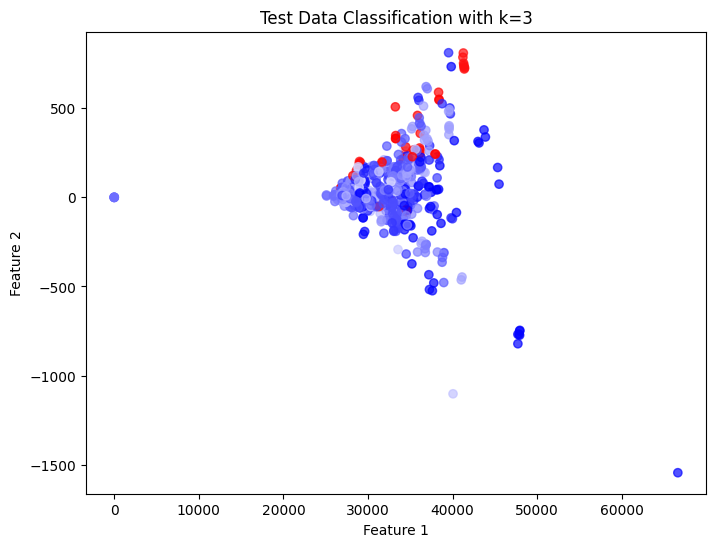

In [ ]:


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate confusion matrix and performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Visualize the decision boundaries
plt.figure(figsize=(8, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data Classification with k=3')
plt.show()

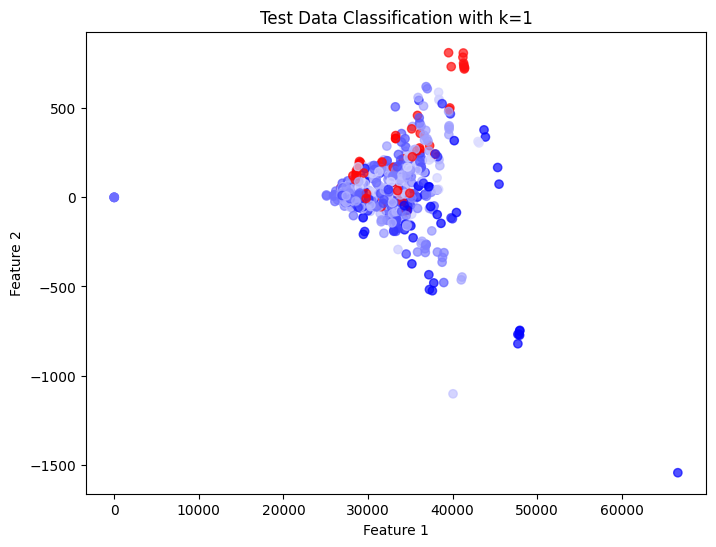

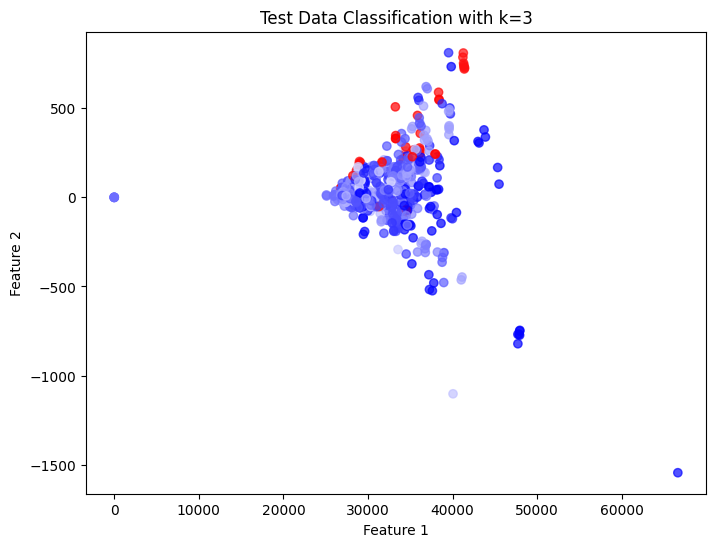

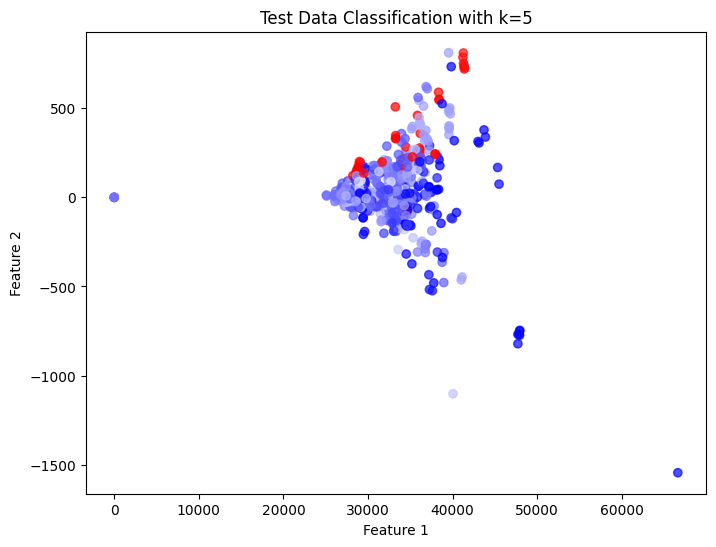

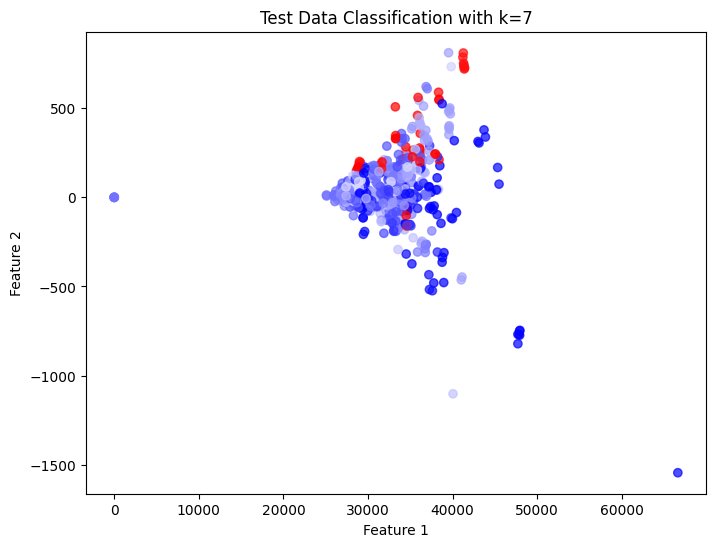

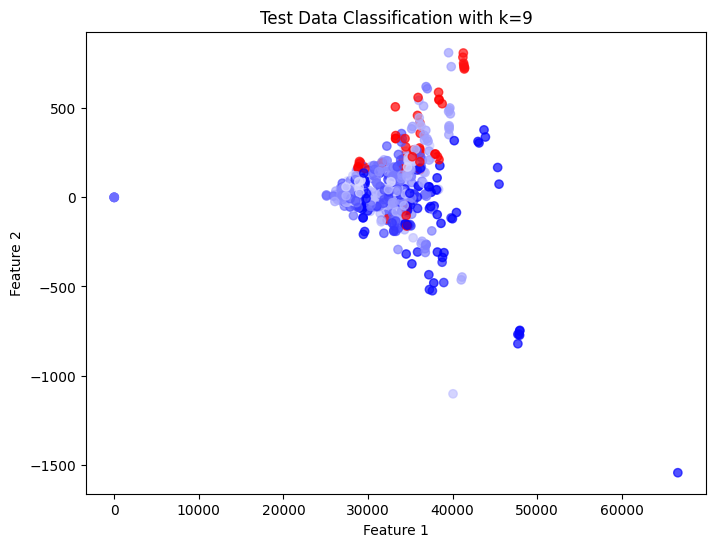

In [ ]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Plot the results for each k
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='bwr', alpha=0.7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Test Data Classification with k={k}')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression  # Replace with your model if needed
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split


# Assume the target variable is named 'target' and features are the rest of the columns
# Adjust these column names according to your actual dataset
X = data.drop(columns='LABEL')
y = data['LABEL']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LinearRegression()  # Replace with your model

# Define the parameter grid (adjust parameters based on your model)
param_grid = {
    'fit_intercept': [True, False]
}

# Initialize and fit GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

# Print the results
print(f'MSE (Train): {mse_train}, MSE (Test): {mse_test}')
print(f'RMSE (Train): {rmse_train}, RMSE (Test): {rmse_test}')
print(f'R2 Score (Train): {r2_train}, R2 Score (Test): {r2_test}')
print(f'MAPE (Train): {mape_train}, MAPE (Test): {mape_test}')


Fitting 5 folds for each of 2 candidates, totalling 10 fits
MSE (Train): 318.73448039524783, MSE (Test): 2285.9651299193724
RMSE (Train): 17.853136430197576, RMSE (Test): 47.81176769289515
R2 Score (Train): 0.6297172993906964, R2 Score (Test): -1.544857659347429
MAPE (Train): 0.003971789444643679, MAPE (Test): 0.005701657281734361
